<a href="https://colab.research.google.com/github/TranHaoDong/BT_AI_WEEK9-15/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
len(train_images)

60000

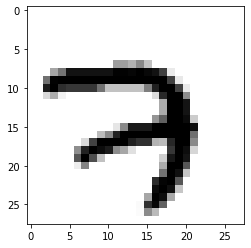

so nay la 7


In [ ]:
from keras.models import Sequential
(train_images, train_labels), (test_images, test_labels ) = mnist.load_data()

hinh = train_images[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('so nay la',train_labels[5000])


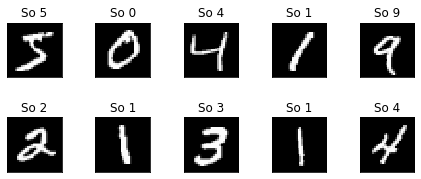

In [ ]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])



In [ ]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (28*28,), activation='relu', name="Layer_1"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_image = train_images.astype('float32')/255 
test_images = test_images.reshape((10000, 28*28))
test_image = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_label = to_categorical(train_labels, 10)
test_label = to_categorical(test_labels, 10)

In [ ]:
#Bien dich
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(train_image, train_label, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_image, test_label)
print('test_accunacy:', test_acc)
print('test_loss:', test_loss)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0047 - accuracy: 0.9992
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 7.2116e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 5.6324e-04 - accuracy: 0.9999
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 4.2370e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0664 - accu

In [ ]:

model.save('model1.h5')
model11= load_model('model1.h5')
label1=model11.predict(test_images[10])